In [1]:
## Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from math import sin, cos, sqrt, atan2, radians
import warnings

In [2]:
## load up zip code/geocode data
geoData = pd.read_csv('../Data/zipCodeGeoCode.csv', converters={'Zip':str})

In [3]:
geoData.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,05769,Salisbury,VT,43.914026,-73.107030,-5,1,"43.914026, -73.10703"
1,01085,Westfield,MA,42.133642,-72.750290,-5,1,"42.133642, -72.75029"
2,01340,Colrain,MA,42.673371,-72.731040,-5,1,"42.673371, -72.73104"
3,25728,Huntington,WV,38.413384,-82.277401,-5,1,"38.413384, -82.277401"
4,26035,Colliers,WV,40.352943,-80.555850,-5,1,"40.352943, -80.55585"


In [4]:
## load up zip code/geocode data
zipPopAll = pd.read_excel('../Data/2010+Census+Population+By+Zipcode+(ZCTA).xlsx', converters={'Zip Code ZCTA':str})
zipPopAll.head()


,Zip Code ZCTA,2010 Census Population
0,01001,16769.0
1,01002,29049.0
2,01003,10372.0
3,01005,5079.0
4,01007,14649.0


In [5]:
zipPopAll.head()

,Zip Code ZCTA,2010 Census Population
0,01001,16769.0
1,01002,29049.0
2,01003,10372.0
3,01005,5079.0
4,01007,14649.0


In [6]:
len(zipPopAll)

33096

In [7]:
len(geoData)

43191

In [8]:
## find lat/long 
mergeDF = pd.merge(geoData, zipPopAll, left_on='Zip', right_on='Zip Code ZCTA')

In [9]:
mergeDF.head()


,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Zip Code ZCTA,2010 Census Population
0,05769,Salisbury,VT,43.914026,-73.10703,-5,1,"43.914026, -73.10703",05769,1216.0
1,01085,Westfield,MA,42.133642,-72.75029,-5,1,"42.133642, -72.75029",01085,41117.0
2,01340,Colrain,MA,42.673371,-72.73104,-5,1,"42.673371, -72.73104",01340,1701.0
3,26035,Colliers,WV,40.352943,-80.55585,-5,1,"40.352943, -80.55585",26035,2491.0
4,36279,Wellington,AL,33.862349,-85.89512,-6,1,"33.862349, -85.89512",36279,2645.0


In [18]:
geoPop = mergeDF[['Zip', 'City', 'State', 'Latitude', 'Longitude', '2010 Census Population']].copy()

In [19]:
def distanceCalculator(lat1Reactor, long1Reactor, lat2City, long2City):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1Reactor)
    lon1 = radians(long1Reactor)
    lat2 = radians(lat2City)
    lon2 = radians(long2City)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance



In [20]:
geoPop.head()
len(geoPop)

32876

In [21]:
#def reactorDistance(popDF, lat1Reactor, long1Reactor):
for index, row in geoPop.iterrows():
   #     warnings.filterwarnings('ignore')
    lat1Reactor = 35.330898
    long1Reactor = -93.247162
    lat2City = row['Latitude']
    long2City = row['Longitude']
    dist = distanceCalculator(lat1Reactor, long1Reactor, lat2City, long2City)
    geoPop.loc[index, 'Distance from Reactor'] = dist

    


In [22]:
geoPop.sort_values(by='Distance from Reactor', inplace=True)
geoPop.head()

,Zip,City,State,Latitude,Longitude,2010 Census Population,Distance from Reactor
16495,72847,London,AR,35.380528,-93.28528,2850.0,6.513935
31050,72835,Delaware,AR,35.299773,-93.35469,923.0,10.355282
9999,72845,Knoxville,AR,35.376739,-93.35706,1216.0,11.197992
7511,72801,Russellville,AR,35.278429,-93.13682,18685.0,11.592383
30417,72802,Russellville,AR,35.308848,-93.10909,20973.0,12.768701


Text(0, 0.5, 'Population')

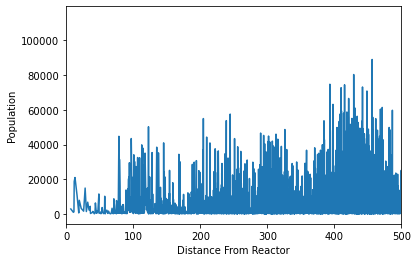

In [23]:
plt.plot(geoPop['Distance from Reactor'], geoPop['2010 Census Population'])
        
plt.xlim(0, 500)
plt.xlabel('Distance From Reactor')
plt.ylabel('Population')